# Loading the libraries 

In [ ]:
import keras
from keras import layers, regularizers
from keras.optimizers import gradient_descent_v2
from tensorflow.keras.layers import Dropout

from google.colab import drive

import os
import numpy as np

from sklearn.model_selection import train_test_split

# Loading and preparing the input data
The input was previously saved as a list of row-wise no
rmalized F matrices in the google drive.

In [ ]:
# Mounting google drive to import the data from
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing data from google drive
import os
!pwd
os.chdir('gdrive/My Drive/6.8700_Project/Real_Data')

/content


In [ ]:
import glob
import pandas as pd

df_list = []
l = 0

print('Rpe data:')
for name in glob.glob('average_K562_essential_normalized_singlecell_combined.csv'):
#for name in glob.glob('average_rpe1_normalized_singlecell_expression_fold_?.csv'):
    print(name)
    df = pd.read_csv(name)
    # removing some rows that had "inf" values for some gene in row 773 and 7003
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    df_list.append(df)
    #df_mod = df.pop('gene_id')
    l += 1

print("Data frame \n", df_list[0])
print("Number of data: ", l)

Rpe data:
average_K562_essential_normalized_singlecell_combined.csv
Data frame 
       Unnamed: 0                0         1         2         3         4  \
0              0  ENSG00000237491  0.001255 -0.354926  0.239748 -0.148540   
1              1  ENSG00000228794 -0.151820  0.161331 -0.021952  0.366233   
2              2  ENSG00000188976 -0.126135  0.432869 -0.009308 -0.140826   
3              3  ENSG00000187961  0.204174  0.025536 -0.287480 -0.089832   
4              4  ENSG00000188290 -0.057030 -0.058446 -0.018628 -0.059684   
...          ...              ...       ...       ...       ...       ...   
8558        8558  ENSG00000278704  0.492977  0.205076 -0.124605  0.252907   
8559        8559  ENSG00000274847 -0.065948  0.063449 -0.292631  0.024620   
8560        8560  ENSG00000278384  0.291067 -0.263260  0.425603  0.244955   
8561        8561  ENSG00000271254 -0.344055  0.188710 -0.376861  0.044645   
8562        8562  ENSG00000276345 -0.352692 -0.211312  0.418141  0.06274

In [ ]:
# Converting the dataframe into numpy array & removing the first column that contains the gene labels
X = []
X_masked = []
for i in range(len(df_list)):
  X.append(df_list[i].to_numpy())
  X[i] = X[i][:,2:]
  X_masked.append(np.array(X[i], dtype=float))

print(np.shape(X_masked))

(1, 8563, 2273)


In [ ]:
# iterating the columns
phenotypes = []
for col in df_list[0].columns:
    phenotypes.append(col)

print(phenotypes)

phenotypes = phenotypes[1:]
print(phenotypes)
print(len(phenotypes))

['gene_id', '10005_ZBTB4_P1_ENSG00000174282', '10020_ZC3H13_P1P2_ENSG00000123200', '10023_ZC3H18_P1P2_ENSG00000158545', '10024_ZC3H3_P1P2_ENSG00000014164', '10025_ZC3H4_P1_ENSG00000130749', '10029_ZC3H8_P1P2_ENSG00000144161', '10040_ZCCHC9_P1P2_ENSG00000131732', '10041_ZCRB1_P1P2_ENSG00000139168', '1004_C17orf58_P1P2_ENSG00000186665', '10054_ZDHHC7_P1P2_ENSG00000153786', '10055_ZDHHC7_P1P2_ENSG00000153786', '10056_ZDHHC7_P1P2_ENSG00000153786', '10073_ZFC3H1_P1P2_ENSG00000133858', '10094_ZFP69B_P1P2_ENSG00000187801', '10104_ZFR_P1P2_ENSG00000056097', '1011_C18orf21_P1P2_ENSG00000141428', '10135_ZMAT2_P2_ENSG00000146007', '10136_ZMAT2_P1_ENSG00000146007', '10139_ZMAT5_P1P2_ENSG00000100319', '10146_ZMYM4_P1P2_ENSG00000146463', '10152_ZNF100_P1P2_ENSG00000197020', '10163_ZNF131_P1P2_ENSG00000172262', '10165_ZNF133_P1P2_ENSG00000125846', '1016_C19orf25_P1P2_ENSG00000119559', '10173_ZNF143_P1P2_ENSG00000166478', '10201_ZNF207_P2_ENSG00000010244', '10202_ZNF207_P1_ENSG00000010244', '1022_C19o

In [ ]:
genes = np.array(df_list[0].iloc[:, 0])
genes.tolist()
print(genes)

['ENSG00000188976' 'ENSG00000187583' 'ENSG00000188290' ...
 'ENSG00000198786' 'ENSG00000198695' 'ENSG00000198727']


      Component 1  Component 2
0       -0.493768     0.151270
1       -0.207966     0.298948
2       -1.179059     1.594999
3       -0.856309     0.117063
4       -0.380511    -0.346138
...           ...          ...
2657    -1.297238     0.586489
2658    -0.191749    -0.139985
2659    -1.149869     0.251993
2660    -0.307598     0.302121
2661     0.813044    -1.096554

[2662 rows x 2 columns]


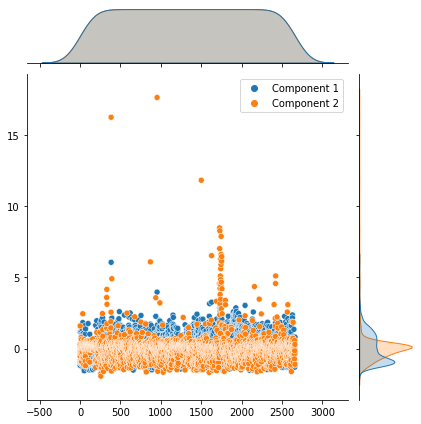

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd 
import seaborn as sns

pca = PCA(n_components=2, whiten=True) 
#fit the model to our data and extract the results

X_pca = pca.fit_transform(X_masked[0].T)
#create a dataframe from the dataset
df = pd.DataFrame(data = X_pca,
                 columns = ["Component 1",
                            "Component 2"])
#                            "Component 3"])

#                            "Component 4",
#                            "Component 5"])

print(df)

#plot the resulting data from two dimensions
g = sns.jointplot(data = df)

In [ ]:
# for phenotype clustering
x = X_masked[0].T
# for genotype clustering
#x = X_masked[0]
print(np.shape(x))

x = np.expand_dims(x, axis=2) 
print(np.shape(x))

(2273, 8563)
(2273, 8563, 1)


In [ ]:
# Splitting test and train data 
#print(np.shape(x))

#x_train, x_test = train_test_split(x , random_state=104, test_size=0.01, shuffle=True)
x_train = x_test = x
print(np.shape(x_train[1]))
print(np.shape(x_train))
print(x_test[0])
print(np.shape(x_test))

(8563, 1)
(2273, 8563, 1)
[[ 0.00125502]
 [-0.15181994]
 [-0.12613463]
 ...
 [ 0.29106724]
 [-0.34405521]
 [-0.35269193]]
(2273, 8563, 1)


Flatten the 5x8 test and train matrices into vectors of size 40.

In [ ]:
# Convert to numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(2273, 8563)
(2273, 8563)


# Creating an autoencoder model
Starting with 3 fully-connected neural layers as encoder and as decoder.

Also, using a compression factor of 10 for now.


In [ ]:
# Setting the size of our encoded representations
encoding_dim =  np.shape(x)[2] * 100
print("Encoding dimensions :", encoding_dim) # -> compression of factor 20, assuming the input is 40 floats

# This is our input image
input_mat = keras.Input(shape=(x_train.shape[1],))
#encoded = layers.Dropout(0.1)(input_mat)
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim*5, activation='LeakyReLU', activity_regularizer = regularizers.l1(10e-5))(input_mat)
#encoded = layers.Dropout(0.1)(encoded)

encoded = layers.Dense(encoding_dim*2, activation='LeakyReLU')(encoded)
encoded = layers.Dense(encoding_dim, activation='LeakyReLU')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(encoding_dim*2, activation='LeakyReLU')(encoded)
decoded = layers.Dense(encoding_dim*5, activation='LeakyReLU')(decoded)
decoded = layers.Dense(x_train.shape[1], activation='LeakyReLU')(decoded)


# Mapping the input to its reconstruction
autoencoder = keras.Model(input_mat, decoded)
autoencoder.summary()

Encoding dimensions : 100
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8563)]            0         
                                                                 
 dense (Dense)               (None, 500)               4282000   
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 200)               20200     
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dense_5 (Dense)             (None,

Creating a separate encoder model:



In [ ]:
# Mapping an input to its encoded representation
encoder = keras.Model(input_mat, encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8563)]            0         
                                                                 
 dense (Dense)               (None, 500)               4282000   
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
Total params: 4,402,300
Trainable params: 4,402,300
Non-trainable params: 0
_________________________________________________________________


As well as the decoder model:

In [ ]:
# This is our encoded input with dim = 4
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last 3 layer of the autoencoder model
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))
#decoder = keras.Model(encoded_input, decoder_layer3((encoded_input)))
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_3 (Dense)             (None, 200)               20200     
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dense_5 (Dense)             (None, 8563)              4290063   
                                                                 
Total params: 4,410,763
Trainable params: 4,410,763
Non-trainable params: 0
_________________________________________________________________


# Train our autoencoder

Training to reconstruct the relationship matrices.
Configuring to use a per-element binary crossentropy loss, and the Adam optimizer:

In [ ]:
import tensorflow as tf
from keras import backend as K

# define the custom metrics
def rmse(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true), axis = -1))

#sgd = gradient_descent_v2.SGD(learning_rate=0.001, decay=1e-4, momentum=0.9, nesterov=True)
#adam = SGD(learning_rate=0.01, momentum=0.8)
#model.compile(optimizer='sgd', loss=tf.keras.losses.Huber())
autoencoder.compile(optimizer= 'adam', loss='mse', metrics=['mse','mae'])

Training for a set number of epochs



In [ ]:
num_epochs = 1000

from keras.callbacks import ModelCheckpoint, EarlyStopping 
mc = ModelCheckpoint('AE_model_RPE1_L100_pheno_combined_data.h5', monitor='val_mse', mode='min', verbose=2, save_best_only=True)
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_mse",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)

In [ ]:
history = autoencoder.fit(x_train, x_train,
                epochs=num_epochs,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test), callbacks=[mc, es])

Epoch 1/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.1030 - mse: 0.0933 - mae: 0.1991
Epoch 1: val_mse improved from inf to 0.08664, saving model to AE_model_RPE1_L100_pheno_combined_data.h5
11/11 [==============================] - 4s 105ms/step - loss: 0.1024 - mse: 0.0928 - mae: 0.1988 - val_loss: 0.0949 - val_mse: 0.0866 - val_mae: 0.1918
Epoch 2/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0876 - mse: 0.0796 - mae: 0.1843
Epoch 2: val_mse improved from 0.08664 to 0.07280, saving model to AE_model_RPE1_L100_pheno_combined_data.h5
11/11 [==============================] - 1s 66ms/step - loss: 0.0863 - mse: 0.0783 - mae: 0.1839 - val_loss: 0.0807 - val_mse: 0.0728 - val_mae: 0.1796
Epoch 3/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0785 - mse: 0.0710 - mae: 0.1780
Epoch 3: val_mse improved from 0.07280 to 0.06855, saving model to AE_model_RPE1_L100_pheno_combined_data.h5
11/11 [==============================] - 1s 63ms/step - l

In [ ]:
loss = history.history['loss']
mse = history.history['mse']
val_loss = history.history['val_loss']
val_mse = history.history['val_mse']
#np.save('rpe1_normalized_AE_k=10_loss_geno', loss)
#np.save('rpe1_normalized_AE_k=10_val_loss_geno',val_loss)
#np.save('rpe1_normalized_AE_k=10_mse_geno', mse)
#np.save('rpe1_normalized_AE_k=10_val_mse_geno',val_mse)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


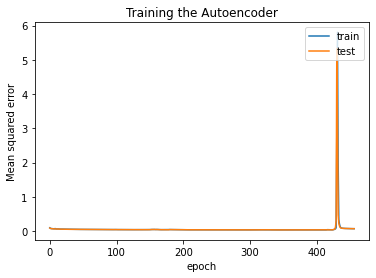

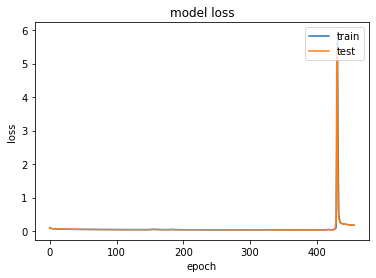

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Training the Autoencoder')
plt.ylabel('Mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("RPE1_100latent_mse_pheno_combined_data.jpg")
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Verifying the test data reconstruction

Checking the reconstructed inputs (from the decoder based on the encoded representations of the test data) and the real test data inputs.

In [ ]:
from keras.models import load_model, Model

# load the best model that was saved
saved_model = load_model('AE_model_K562_L100_pheno_combined_data.h5')

# evaluate the model
_, train_mse, train_mae = saved_model.evaluate(x_train, x_train, verbose=0)
_, test_mse, test_mae = saved_model.evaluate(x_test, x_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))


# Get the encoder part of the saved model with the learned weights
en_model = Model(saved_model.input, saved_model.layers[-4](saved_model.layers[-5](saved_model.layers[-6].output)))
de_input = keras.Input(shape=(encoding_dim,))
de_model = Model(de_input, autoencoder.layers[-1](autoencoder.layers[-2](autoencoder.layers[-3](de_input))))

Train: 0.021, Test: 0.021


In [ ]:
encoded_mats = en_model.predict(x_test)
decoded_mats = de_model.predict(encoded_mats)

72/72 [==============================] - 0s 2ms/step


In [ ]:
np.shape(encoded_mats)
np.save('AE_model_RPE1_L100_pheno_combined_data_encoded_mats', encoded_mats)

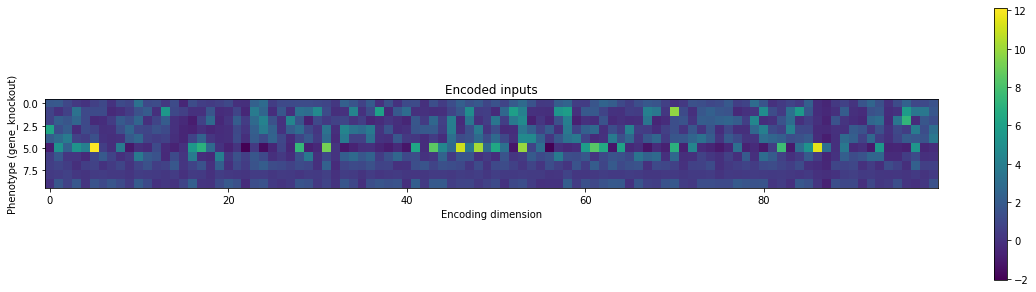

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

#plt.figure(figsize=(6, 6))
figure(figsize=(20,5))
plt.title('Encoded inputs')
plt.ylabel('Phenotype (gene_knockout)')
plt.xlabel('Encoding dimension')
plt.imshow(encoded_mats[0:10])
plt.colorbar()
plt.savefig("RPE1_100latent_encoded_mats_pheno_combined_data.jpg")

In [ ]:
# Num of F instances to display
n = 1  
decoded_rounded = [None]*n
input_rounded = [None]*n

#input_rounded = np.array(input_rounded)

for i in range(n-1,n):
    # Display original F matrix
    input_rounded[i] = np.around(x_test[i], decimals=4, out=None)
    #print(input_rounded[i])
    print(input_rounded[i].reshape((np.array(x)).shape[1:]))
    
    # Display reconstructed matrix
    decoded_rounded[i] = np.around(decoded_mats[i], decimals=4, out=None)
    print(decoded_rounded[i].reshape((np.array(x)).shape[1:]))
    

[[ 0.0107]
 [-0.0124]
 [ 0.1668]
 ...
 [ 1.0998]
 [-0.2276]
 [ 1.3014]]
[[ 6.0000e-04]
 [ 2.9800e-02]
 [-3.5200e-02]
 ...
 [ 7.7570e-01]
 [-1.6750e-01]
 [ 1.0653e+00]]


# Testing different embeddings

      Component 1  Component 2
0       -0.281126     0.355516
1       -0.769014     2.203595
2        0.010330     0.937239
3       -0.370065    -0.307657
4       -0.692607    -0.114842
...           ...          ...
2657     0.661725     0.628782
2658    -0.012211    -0.471072
2659     1.115610     0.160051
2660     0.273987    -0.386429
2661    -0.236302    -0.112869

[2662 rows x 2 columns]


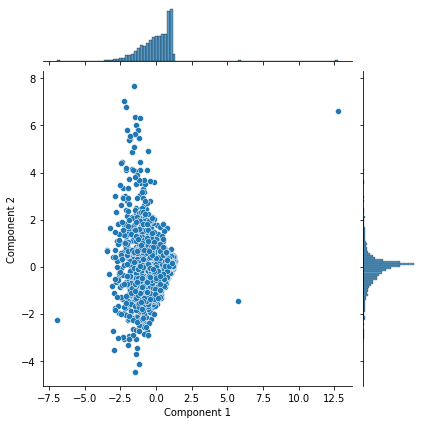

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd 
import seaborn as sns

pca = PCA(n_components=2, whiten=True) 
#fit the model to our data and extract the results
X_pca = pca.fit_transform(encoded_mats)
#create a dataframe from the dataset
df = pd.DataFrame(data = X_pca,
                 columns = ["Component 1", 
                            "Component 2"])


print(df)

#plot the resulting data from two dimensions
g = sns.jointplot(data = df,
                 x = "Component 1",
                 y = "Component 2")
plt.savefig('RPE1_100latent_PCA_pheno_combined_data.png')

# t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1,n_iter=5000)
res = tsne.fit_transform(encoded_mats)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2273 samples in 0.000s...
[t-SNE] Computed neighbors for 2273 samples in 0.177s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2273
[t-SNE] Computed conditional probabilities for sample 2000 / 2273
[t-SNE] Computed conditional probabilities for sample 2273 / 2273
[t-SNE] Mean sigma: 0.754549
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.749985
[t-SNE] KL divergence after 5000 iterations: 1.834716


In [ ]:
xmin = int(min(res[:,0]))
xmax = int(max(res[:,0]))
ymin = int(min(res[:,1]))
ymax = int(max(res[:,1]))
print(xmin, xmax, ymin, ymax)

-67 56 -40 52


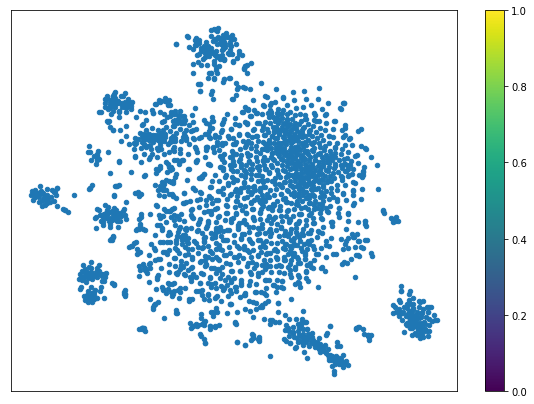

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
scatter =plt.scatter(res[:,0],res[:,1], cmap='coolwarm', s=20)
#plt.savefig("RPE1_100latent_tSNE_pheno_combined_data.jpg")
plt.colorbar()
scatter.axes.get_xaxis().set_visible(False)
scatter.axes.get_yaxis().set_visible(False)


# Kmeans on the tSNE embedding

(2273, 2)
(2273, 8563)


[[ 25.19757    -6.969032 ]
 [ -8.269706  -25.084606 ]
 [ 10.721508   22.2391   ]
 [  7.596539  -11.282789 ]
 [ -2.631648   11.869722 ]
 [ 15.8369875 -39.11119  ]
 [ 41.247684  -32.705635 ]
 [ -7.065451   42.631615 ]
 [-14.625798   -4.9185085]
 [ 17.8553      9.180216 ]
 [-39.50008     1.2720937]
 [-23.82771    22.037798 ]
 [-32.303802  -21.871698 ]]


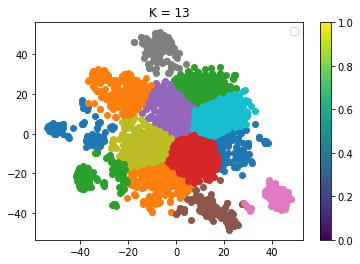

In [ ]:
#Import required module
from sklearn.cluster import KMeans

def plot_clusters(df,labels):
  #Getting unique labels
  # print(df.shape)
  df['labels'] = labels 
  u_labels = np.unique(labels)
  
  #plotting the results:
  
  for i in u_labels:
      plt.scatter(df.values[labels == i , 0] , df.values[labels == i , 1])
  plt.legend()
  plt.colorbar()
  plt.show()

df1 = pd.DataFrame(data = res,
                 columns = ["Component 1",
                            "Component 2"])
print(np.shape(df1))
print(np.shape(x_train))

labels = []


#for rep in range(2,100):
for rep in range(13,14):
  kmeans = KMeans(n_clusters= rep, init='k-means++')
  label1 = kmeans.fit_predict(res)
  print(kmeans.cluster_centers_)
  plt.title("K = " + str(rep))
  plot_clusters(df1,label1)
  labels.append(label1)


In [ ]:
import pandas as pd 
pd.DataFrame(res).to_csv("K562_res_points_100latent_combined_data.csv")

In [ ]:
for x in res[:,0]:
  for y in res[:,1]:
    if x>-1 and x<1 and y<42 and y>40:
      print(x,y)

0.9134731 40.24167
0.9134731 41.979717
0.9134731 40.64305
0.9134731 41.56537
0.9134731 40.483307
0.9134731 40.940273
0.9134731 41.321945
0.9134731 40.540592
0.9134731 40.362724
0.9134731 40.75302
0.9134731 40.012287
0.9134731 41.353146
0.9134731 41.991764
0.9134731 41.658066
0.9134731 40.220325
-0.7810263 40.24167
-0.7810263 41.979717
-0.7810263 40.64305
-0.7810263 41.56537
-0.7810263 40.483307
-0.7810263 40.940273
-0.7810263 41.321945
-0.7810263 40.540592
-0.7810263 40.362724
-0.7810263 40.75302
-0.7810263 40.012287
-0.7810263 41.353146
-0.7810263 41.991764
-0.7810263 41.658066
-0.7810263 40.220325
0.44077033 40.24167
0.44077033 41.979717
0.44077033 40.64305
0.44077033 41.56537
0.44077033 40.483307
0.44077033 40.940273
0.44077033 41.321945
0.44077033 40.540592
0.44077033 40.362724
0.44077033 40.75302
0.44077033 40.012287
0.44077033 41.353146
0.44077033 41.991764
0.44077033 41.658066
0.44077033 40.220325
0.9236822 40.24167
0.9236822 41.979717
0.9236822 40.64305
0.9236822 41.56537
0.923

KeyboardInterrupt: ignored

In [ ]:
print(np.shape(np.array(labels).T))
phenotypes_arr = np.expand_dims(np.array(phenotypes).T, axis=1)
#genotypes_arr = np.expand_dims(np.array(df_list[0].gene_id).T, axis=1)
print(np.shape(phenotypes_arr))
#print(np.shape(genotypes_arr))

(2662, 98)
(2662, 1)


In [ ]:
# Saving the labels from K-means clustering in a csv file
labels_named = np.hstack((phenotypes_arr, np.array(labels).T))
#labels_named = np.hstack((genotypes_arr, np.array(labels).T))
print(np.shape(labels_named))
print(labels_named[:,0:2])
np.save('RPE1_cluster_labels_100latent_K=2to99_pheno_combined_data', labels_named)

(2662, 99)
[['10005_ZBTB4_P1_ENSG00000174282' '1']
 ['10020_ZC3H13_P1P2_ENSG00000123200' '1']
 ['10023_ZC3H18_P1P2_ENSG00000158545' '1']
 ...
 ['997_C16orf86_P1P2_ENSG00000159761' '0']
 ['9998_ZBTB44_P1P2_ENSG00000196323' '0']
 ['9_AAR2_P1P2_ENSG00000131043' '1']]


In [ ]:
import pandas as pd 
pd.DataFrame(labels_named).to_csv("RPE1_cluster_labels_100latent_K=2to99_pheno_combined_data.csv")

# Agglomerative Clustering

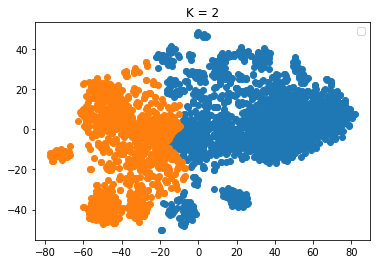

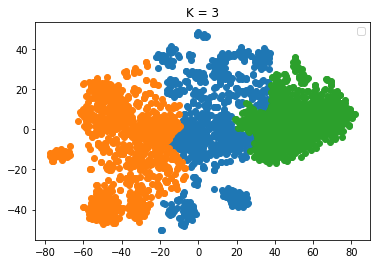

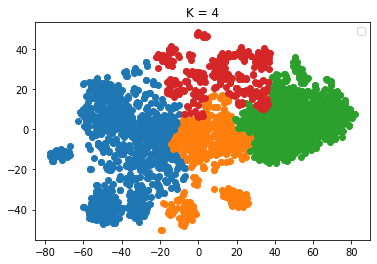

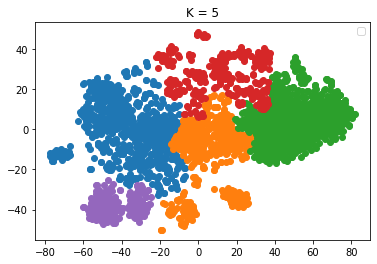

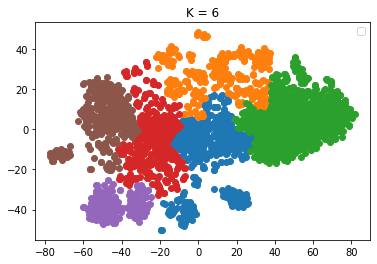

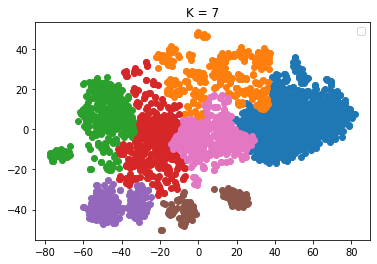

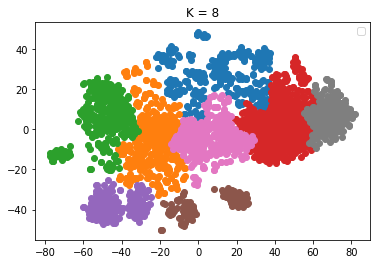

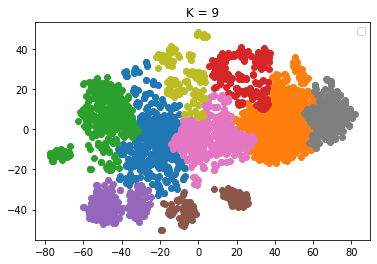

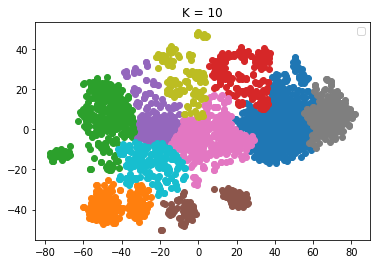

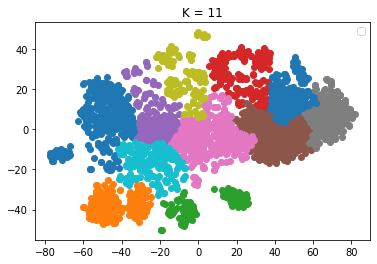

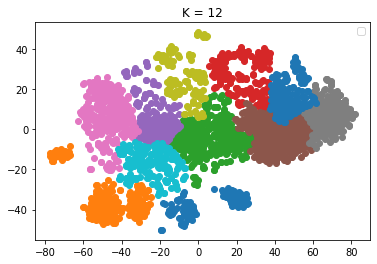

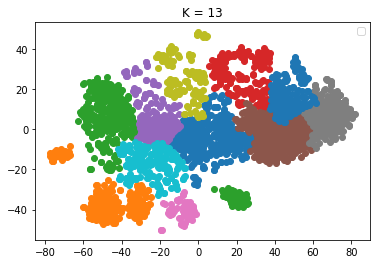

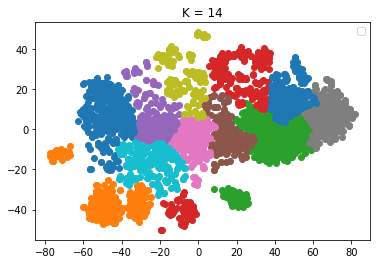

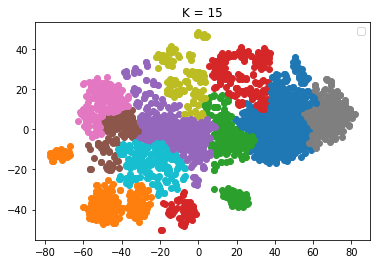

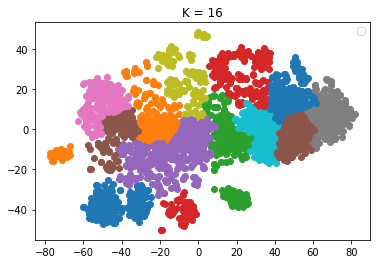

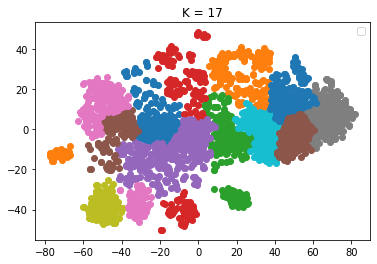

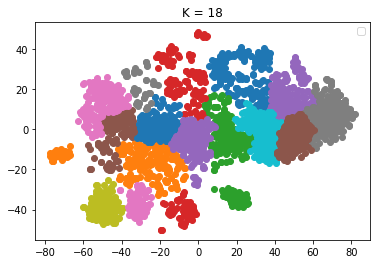

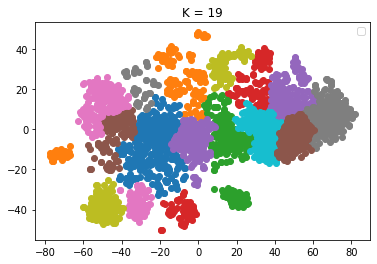

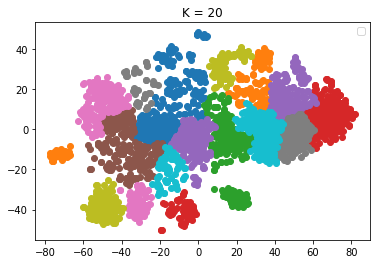

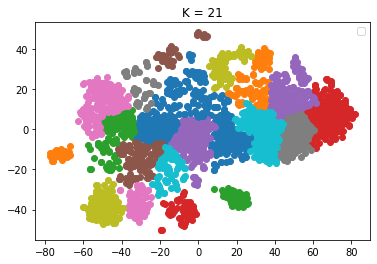

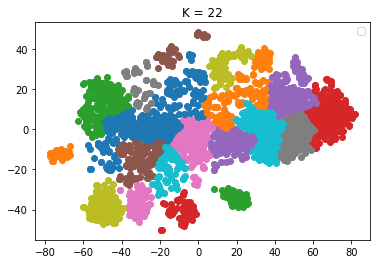

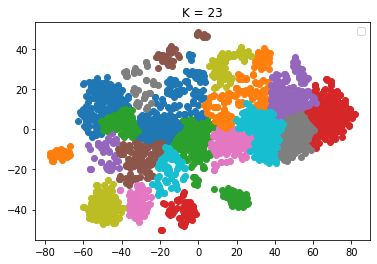

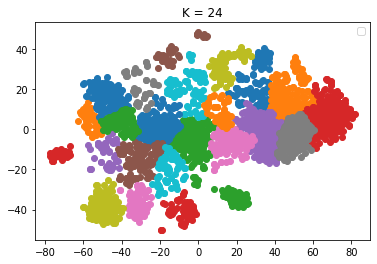

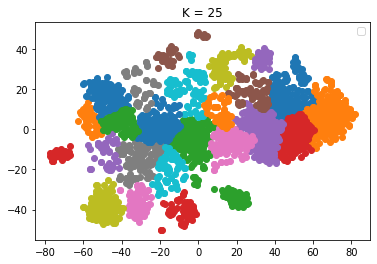

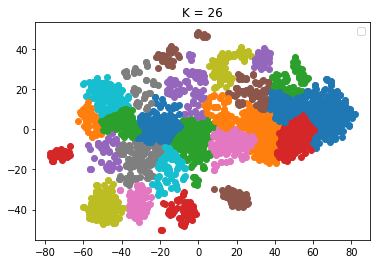

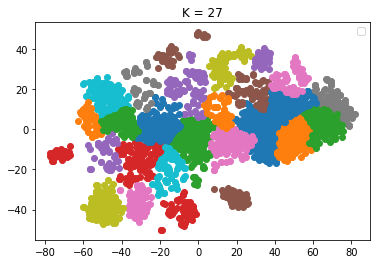

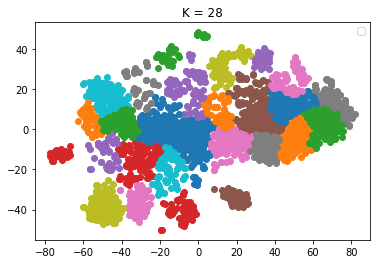

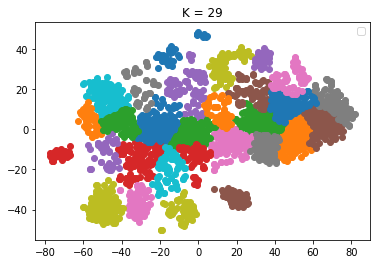

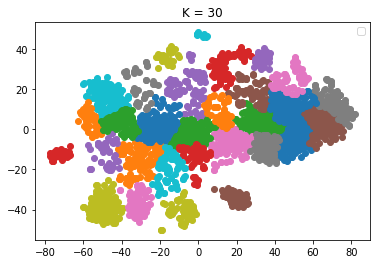

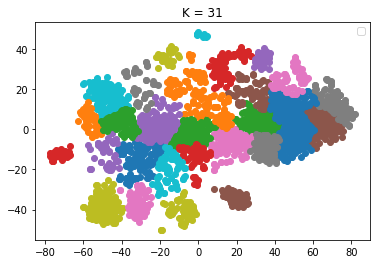

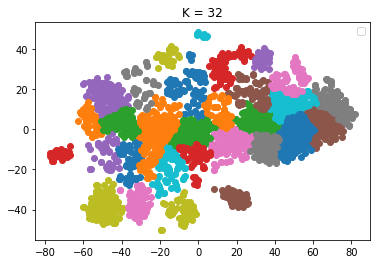

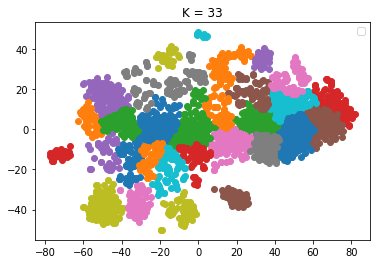

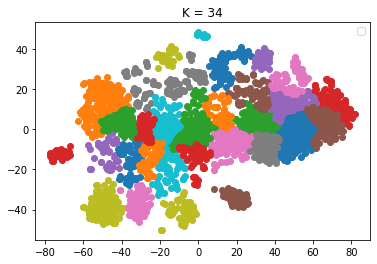

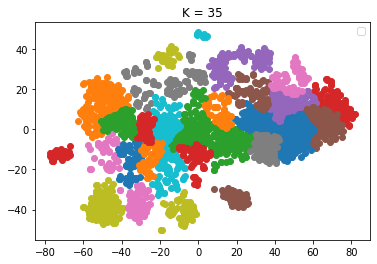

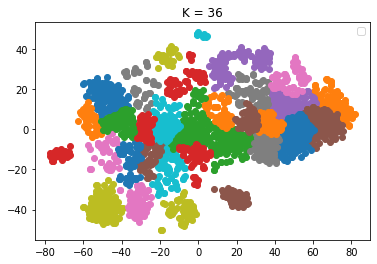

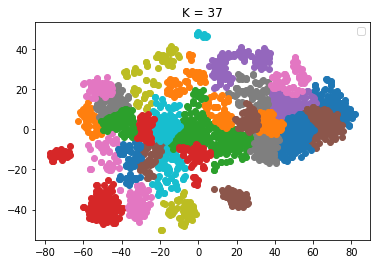

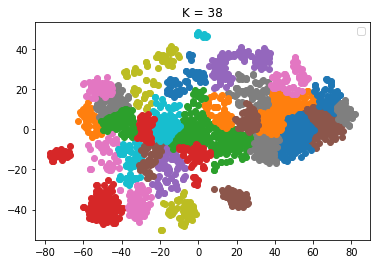

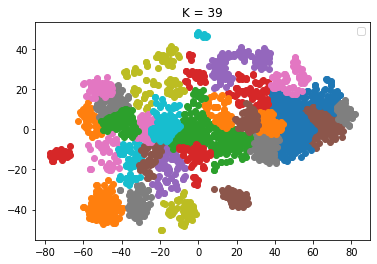

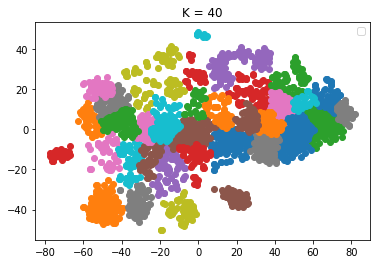

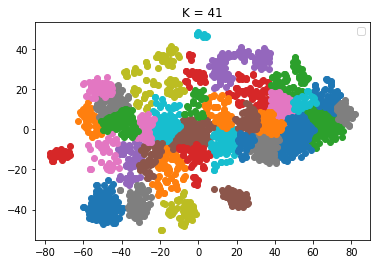

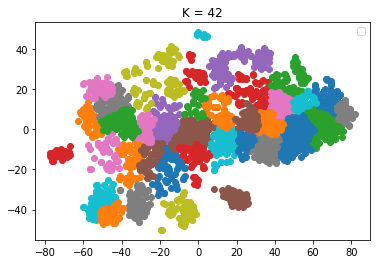

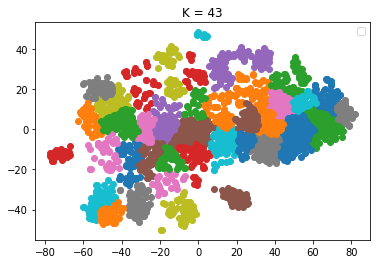

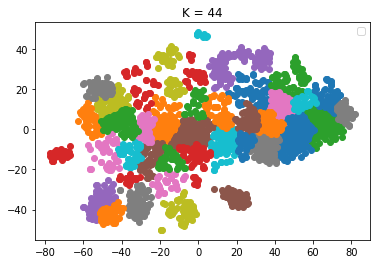

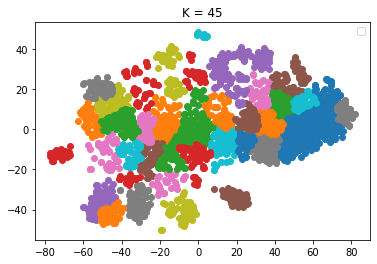

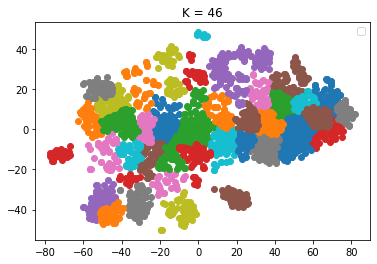

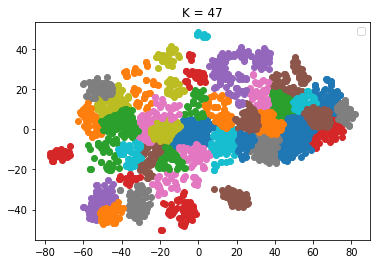

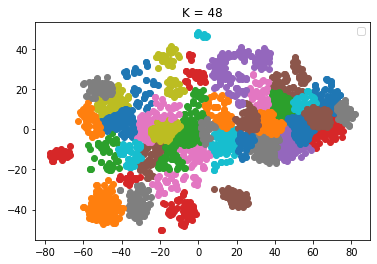

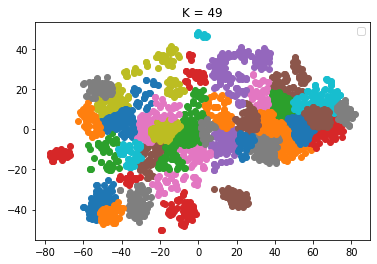

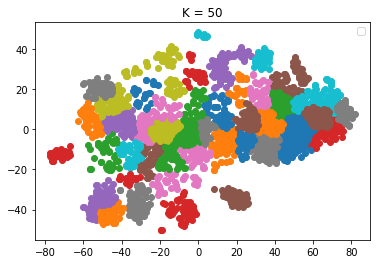

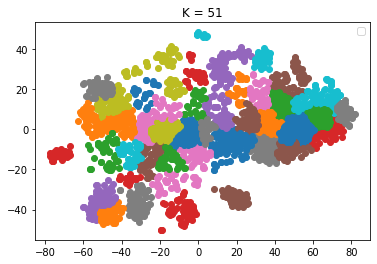

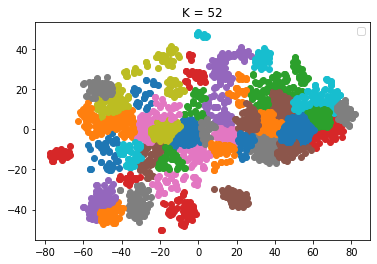

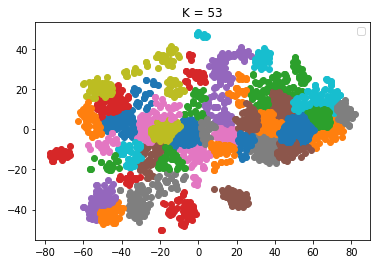

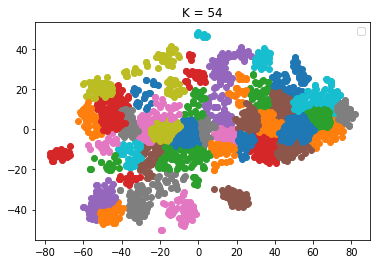

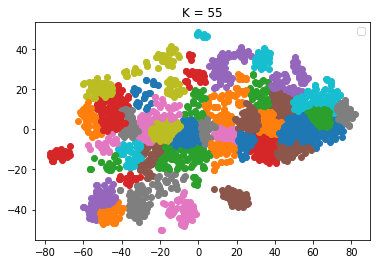

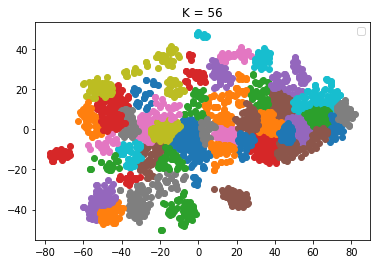

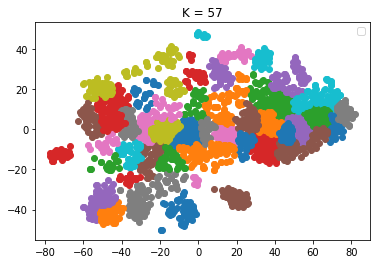

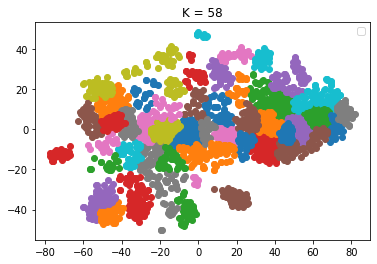

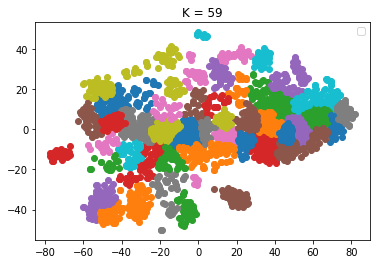

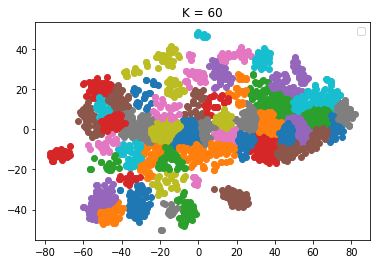

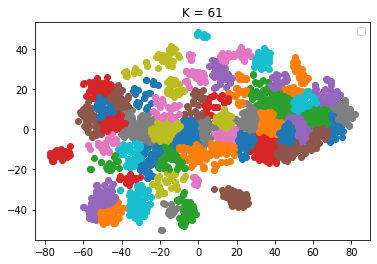

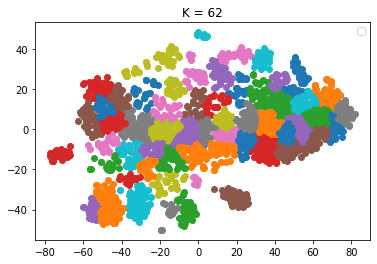

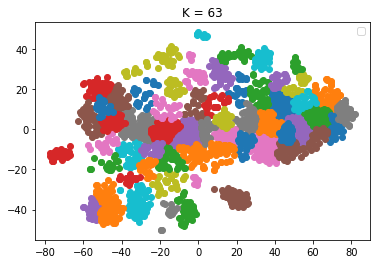

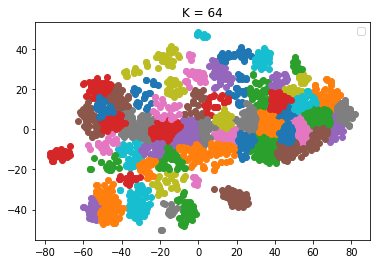

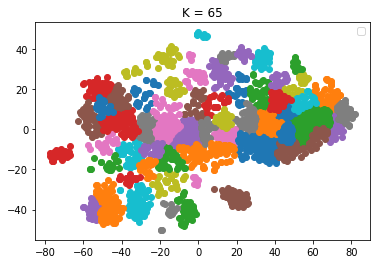

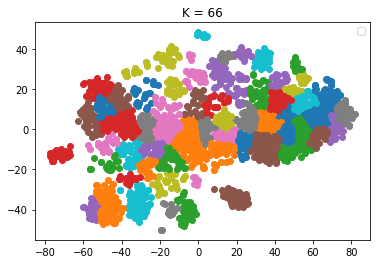

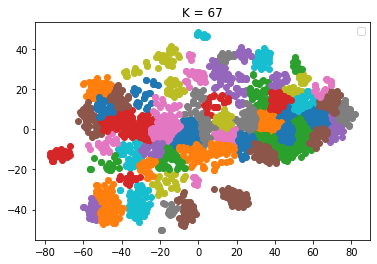

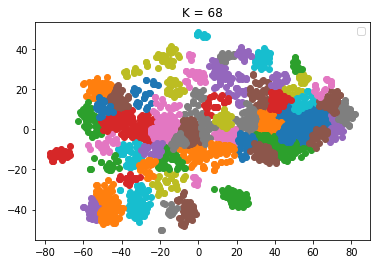

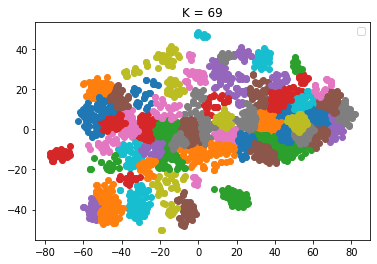

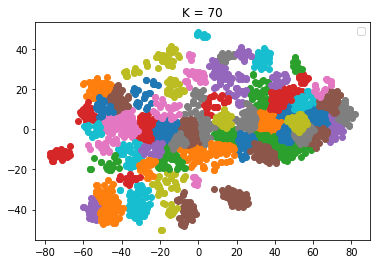

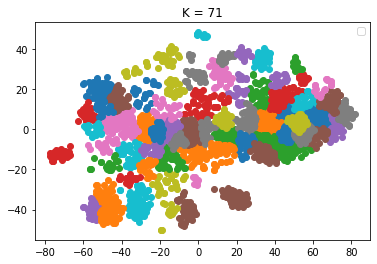

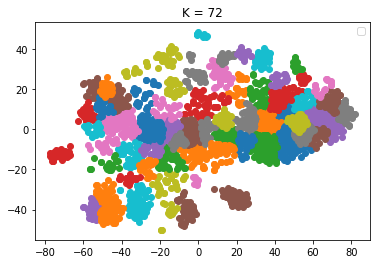

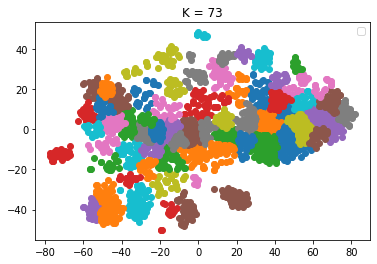

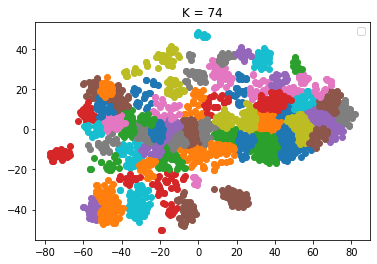

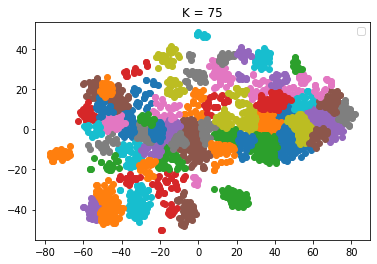

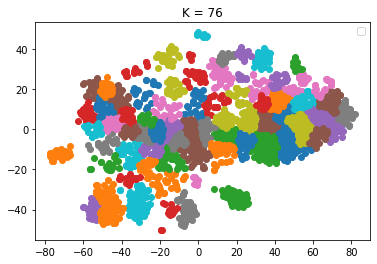

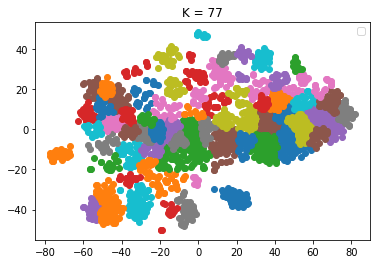

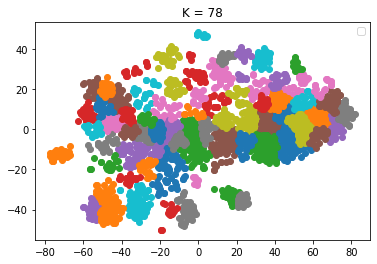

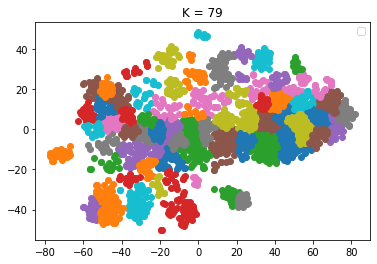

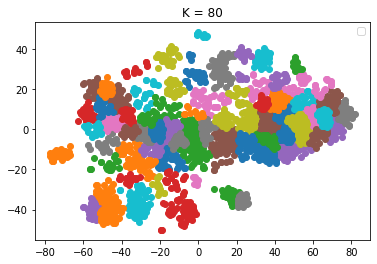

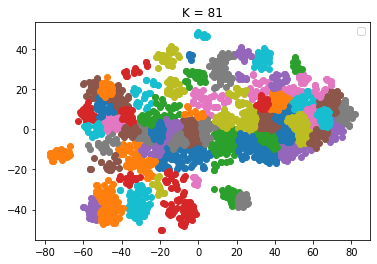

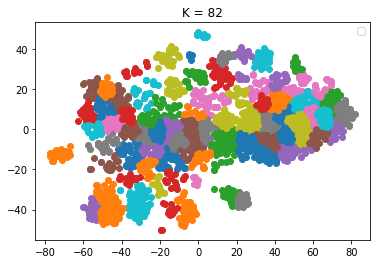

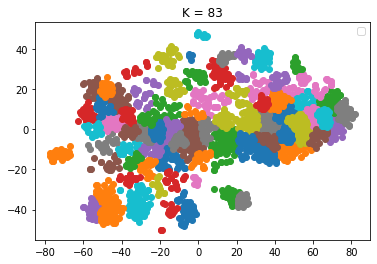

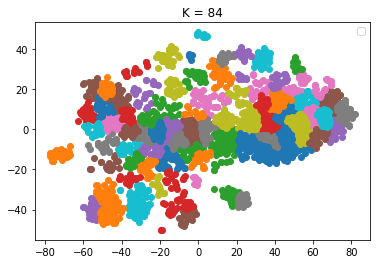

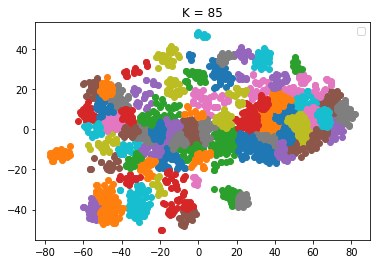

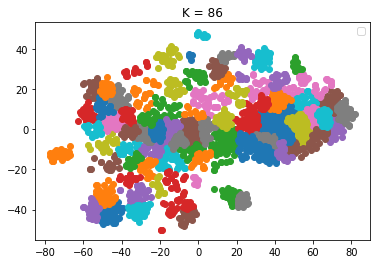

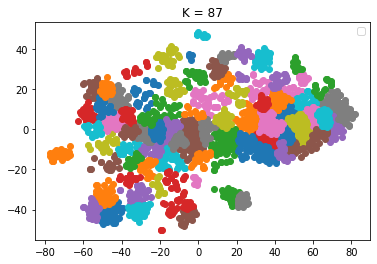

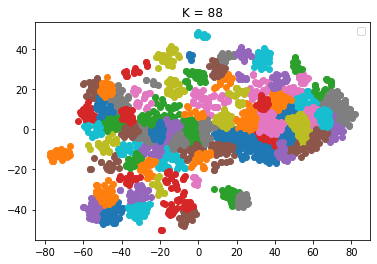

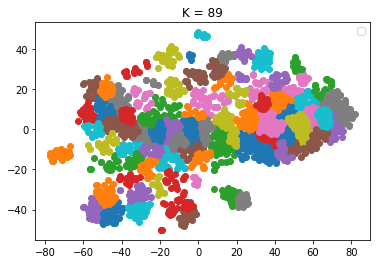

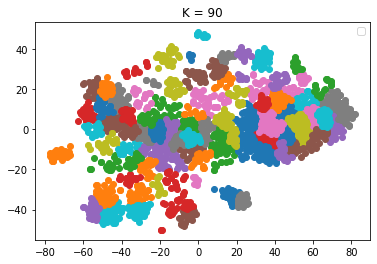

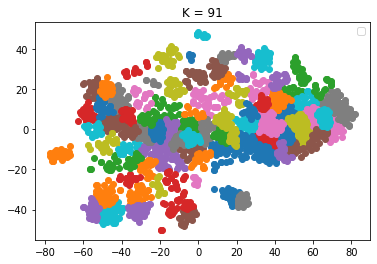

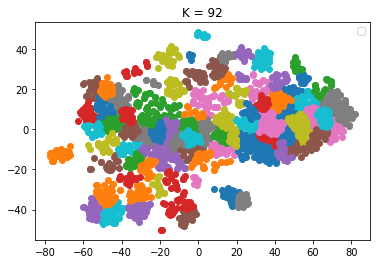

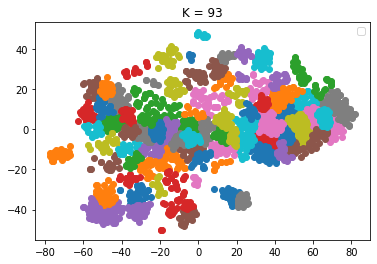

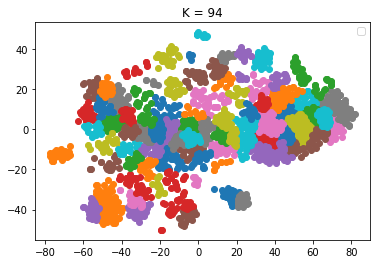

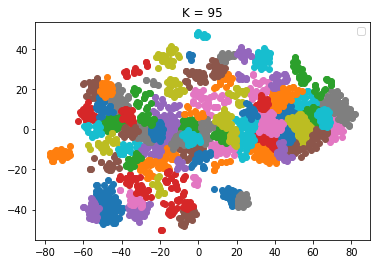

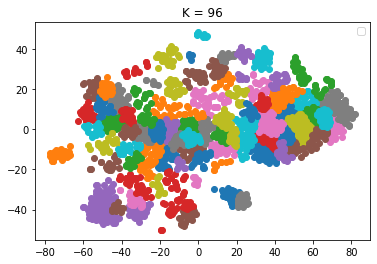

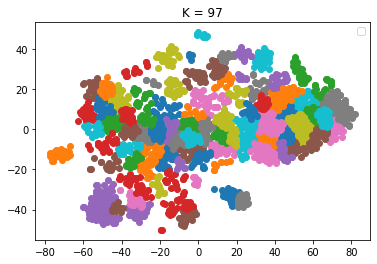

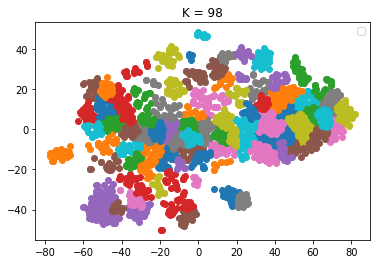

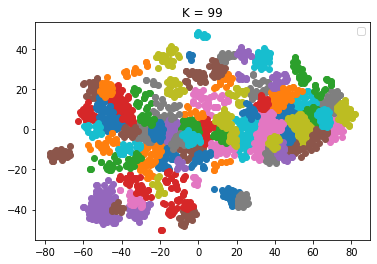

In [ ]:
from sklearn.cluster import AgglomerativeClustering
df1 = pd.DataFrame(data = res,
                 columns = ["Component 1",
                            "Component 2"])
labels2 = []


for rep in range(2,100):
  clustering = AgglomerativeClustering(n_clusters= rep).fit(res)
  label2 = clustering.labels_
  plt.title("K = " + str(rep))
  plot_clusters(df1,label2)
  labels2.append(label2)


In [ ]:
#print(np.shape(np.array(phenotypes).T))
labels2_named = np.hstack((phenotypes_arr, np.array(labels2).T))
#labels2_named = np.hstack((genotypes_arr, np.array(labels2).T))
print(np.shape(labels2_named))
print(labels2_named[:,0:2])
np.save('RPE1_cluster_labels_100latent_agglo=2to99_pheno_combined_data', labels2_named)

(2662, 99)
[['10005_ZBTB4_P1_ENSG00000174282' '1']
 ['10020_ZC3H13_P1P2_ENSG00000123200' '0']
 ['10023_ZC3H18_P1P2_ENSG00000158545' '0']
 ...
 ['997_C16orf86_P1P2_ENSG00000159761' '0']
 ['9998_ZBTB44_P1P2_ENSG00000196323' '0']
 ['9_AAR2_P1P2_ENSG00000131043' '1']]


In [ ]:
import pandas as pd 
pd.DataFrame(labels2_named).to_csv("'RPE1_cluster_labels_100latent_agglo=2to99_pheno_combined_data.csv")

# Optimal k using elbow method

In [ ]:
distortions = []
K = range(2,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++')
    kmeanModel.fit(res)
    distortions.append(kmeanModel.inertia_)


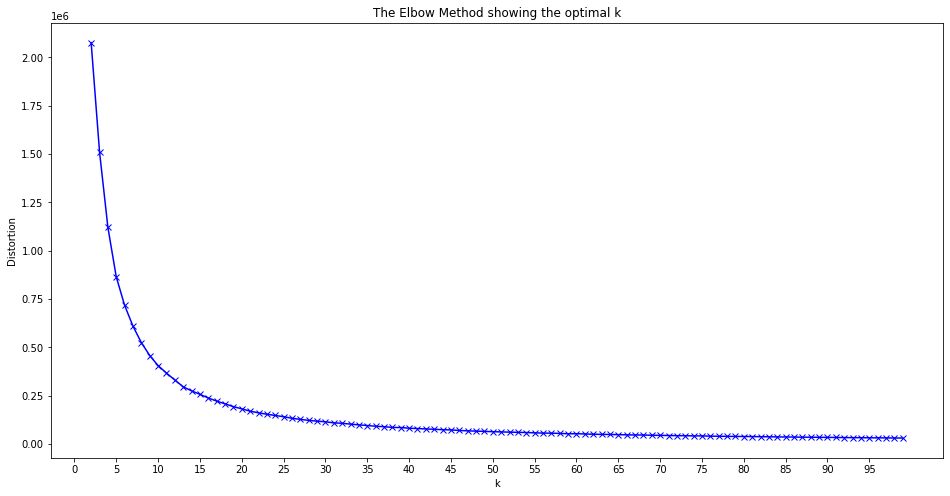

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.xticks(np.arange(0,100, 5))
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig("RPE1_100latent_k-elbow_pheno.jpg")
plt.show()

# Correlations in the data

In [ ]:
from scipy import stats
corr, p_val = stats.spearmanr(x_train,axis=1)
print(p_val)
print(corr.shape)

[[0.00000000e+00 3.00491450e-30 4.48452885e-36 ... 3.85630591e-02
  9.02592026e-33 3.50809748e-69]
 [3.00491450e-30 0.00000000e+00 2.44140594e-04 ... 2.05633434e-01
  1.47079708e-01 7.69362399e-21]
 [4.48452885e-36 2.44140594e-04 0.00000000e+00 ... 3.21814601e-01
  2.04885724e-05 8.60567522e-09]
 ...
 [3.85630591e-02 2.05633434e-01 3.21814601e-01 ... 0.00000000e+00
  5.26480973e-04 6.20202989e-04]
 [9.02592026e-33 1.47079708e-01 2.04885724e-05 ... 5.26480973e-04
  0.00000000e+00 2.51936420e-35]
 [3.50809748e-69 7.69362399e-21 8.60567522e-09 ... 6.20202989e-04
  2.51936420e-35 0.00000000e+00]]
(2662, 2662)


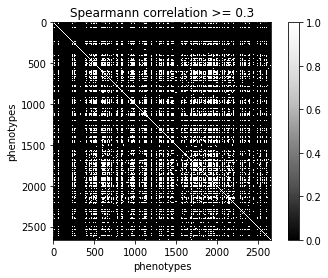

In [ ]:
import matplotlib.pyplot as plt

cor_mat = np.zeros((len(corr),len(corr[0])))
p = []
for i in range(len(corr)):
  pheno = []
  for j in range(len(corr[0])):
    if corr[i][j] >= 0.3:
      cor_mat[i][j] = 1
      if i != j:
        pheno.append(phenotypes[j])
  p.append(phenotypes[i])
  p.append(pheno)


plt.xlabel('phenotypes')
plt.ylabel('phenotypes')
plt.title('Spearmann correlation >= 0.3')
plt.imshow(cor_mat,interpolation='nearest', cmap='Greys_r')
plt.savefig("RPE1_100latent_corr_30_pheno_combined_data.png")
plt.colorbar()

In [ ]:
#print(p)
ppp = []

for l in range(len(p)-1):
  if (l%2 == 0) & (p[l+1] != []):
    #print(p[l+1])
    pp = [p[l],p[l+1]]
    ppp.append(pp)

#print(len(ppp))
#print(ppp)

In [ ]:
print(len(ppp[0][1]))

23


In [ ]:
p4 = []
for j in range(len(ppp)):
  ppp[j][1].append(ppp[j][0])
  p4.append(ppp[j][1])

In [ ]:
import pandas as pd
from numpy import asarray, savetxt
np.save('RPE1_k=100_pheno_corr_30_combined_data',np.array(p4))
pd.DataFrame(p4).to_csv("RPE1_k=100_pheno_corr_30_combined_data.csv")

<ipython-input-49-3f236667fb69>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save('RPE1_k=100_pheno_corr_30_combined_data',np.array(p4))


In [ ]:
labels2_named = np.load('RPE1_cluster_labels_10latent_K=2to99_pheno_combined_data.npy')
print(np.shape(labels2_named))

FileNotFoundError: ignored

In [ ]:
from numpy import load
labels2_named = np.load('RPE1_cluster_labels_100latent_K=2to99_pheno_combined_data.npy')
p4p = np.load('RPE1_k=100_pheno_corr_30_combined_data.npy', allow_pickle=True)

k = 5
grp_label = []
for a in range(len(p4p)):
  y = []
  for b in p4p[a]:
    for c in range(len(labels2_named)):
      if b == labels2_named[c,0]:
        y.append(labels2_named[c,k])
  grp_label.append(y)

#print(grp_label)


In [ ]:
np.save('RPE1_k=100_pheno_corr_30_group_label_k=5_combined_data',np.array(grp_label))
pd.DataFrame(grp_label).to_csv("RPE1_k=100_pheno_corr_30_group_label_k=5_combined_data.csv")

<ipython-input-122-a8b7083bff07>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save('K562_k=100_pheno_corr_30_group_label_k=5_combined_data',np.array(grp_label))


In [ ]:
p4

[['2238_DLD_P1P2_ENSG00000091140', '1893_CSE1L_P1P2_ENSG00000124207'],
 ['2204_DHX16_P1P2_ENSG00000204560',
  '6791_PRPF18_P1P2_ENSG00000165630',
  '7186_RBMX2_P1P2_ENSG00000134597',
  '8126_SLU7_P1P2_ENSG00000164609',
  '937_BUD13_P1P2_ENSG00000137656',
  '2120_DDX41_P1P2_ENSG00000183258'],
 ['7499_RPS11_P1P2_ENSG00000142534',
  '7500_RPS12_P1P2_ENSG00000112306',
  '7503_RPS15A_P1P2_ENSG00000134419',
  '7509_RPS19_P1P2_ENSG00000105372',
  '7513_RPS24_P1P2_ENSG00000138326',
  '7525_RPS3_P1_ENSG00000149273',
  '7526_RPS4X_P1P2_ENSG00000198034',
  '7537_RPS7_P1P2_ENSG00000171863',
  '9366_TSR2_P1P2_ENSG00000158526',
  '2124_DDX47_P1P2_ENSG00000213782'],
 ['2120_DDX41_P1P2_ENSG00000183258',
  '7186_RBMX2_P1P2_ENSG00000134597',
  '937_BUD13_P1P2_ENSG00000137656',
  '2204_DHX16_P1P2_ENSG00000204560'],
 ['1893_CSE1L_P1P2_ENSG00000124207', '2238_DLD_P1P2_ENSG00000091140'],
 ['2536_EIF2B2_P1P2_ENSG00000119718',
  '2538_EIF2B4_P1P2_ENSG00000115211',
  '2539_EIF2B5_P1P2_ENSG00000145191',
  '2541

# HDB Scan embedding

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 8.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700845 sha256=25492b78962a46f12ed9634767c1447455d9b206862f7bb2292dd992e2d2b85e
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [ ]:
import hdbscan

clusterer =  hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2, min_samples=1)
# clusterer.fit(mu)

from sklearn.metrics.pairwise import pairwise_distances
x = encoded_mats.astype("double")
distance_matrix =  pairwise_distances(x)
clusterer.fit(distance_matrix)

print(np.unique(clusterer.labels_,return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91]), array([1734,    2,    2,    3,    3,    5,    2,    2,    2,    2,    2,
          3,    2,    2,    3,    6,    3,    2,    3,    2,    3,    2,
          2,    2,    2,    2,    2,    4,    3,    2,    3,    2,    4,
          2,    6,    2,    2,    2,    3,    2,    3,    3,    2,    3,
          2,   39,    2,    2,    2,    3,    2,    6,    4,    5,    3,
          2,    2,    4,    3,    3,    2,    2,    3,    3,    2,    2,
          7,    3,    2,    2,    2,    2,    2,    2,    3,    2,    6,
          2,    2,    8,    2,   24,    3,   12,    2,   12,    2,    4,

In [ ]:
labels = clusterer.labels_
np.save('AE_model_K562_pheno_combined_data_k=100_hdb_labels_min_cluster_2', labels)

import pandas as pd

df = pd.DataFrame(labels)
df.to_csv('AE_model_K562_pheno_combined_data_k=100_hdb_labels_min_cluster_2.csv',index=False)